## Author: Igor Dzierwa
## Laboratory 5 - Classification with Keras

We have a datasetofmovie reviews from the Internet Movie Database (IMDB). IMDB dataset has 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification.
- The dataset contains a review and a sentiment which is “positive” or “negative”.

- This dataset comes packaged with Keras, so you just load the dataset. Keep 10000 most frequent words (how?).

- It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.


Data preparation:

- Then encode the integer sequences into a binary matrix.

- To do this you can one-hot encodeyour lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s  except  for  indices  3  and  5,  which  would  be  1s.  Then  you  could  use  as  the  first  layer  in  your network a Dense layer, capable of handling floating-point vector data.

Build a network with, compile and train it on IMDB.
- Two hidden layers with 16 units each with relu activation function.
- Output layer that will output the prediction with sigmoid activation function.

### Libraries import

In [11]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

tf.get_logger().setLevel('INFO')
warnings.filterwarnings('ignore')

### Data import

**Function** `imdb.load_data()` - this is a dataset of 25 000 movies reviews from IMDB, labeled by sentiment (positive/negative).

In [12]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [13]:
print(f"X train shape: {x_train.shape}")
print(f"Y train shape: {y_train.shape}\n")

print(f"X test shape: {x_test.shape}")
print(f"Y test shape: {y_test.shape}\n")

X train shape: (25000,)
Y train shape: (25000,)

X test shape: (25000,)
Y test shape: (25000,)



### Data preparation

**Class** `Tokenizer` - allows to vectorize a text corpus, by turning each text into either a sequence of integers or into a vector where the coefficient for each token could be binary.

- `num_words` parameter - the maximum number of words to keep, based on word frequency.

**Function** `sequences_to_matrix` - converts a list of sequences into a Numpy matrix. 

- available modes - "binary", "count", "tfidf", "freq"

In [14]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")

X train shape: (25000, 10000)
X test shape: (25000, 10000)


### Setting a validation data

**Validation data** - 10 000 instances.
- Data will be passed as the validation_data argument in `fit()` function. At the end of each epoch, the model will iterate over the validation dataset and compute the validation loss and validation metrics.


In [15]:
part_x_train = x_train[10000:]
part_y_train = y_train[10000:]

val_x_train = x_train[:10000]
val_y_train = y_train[:10000]

print(f"Partial X train shape: {part_x_train.shape}")
print(f"Partial Y train shape: {part_y_train.shape}\n")

print(f"Validation X train shape: {val_x_train.shape}")
print(f"Validation Y train shape: {val_y_train.shape}")

Partial X train shape: (15000, 10000)
Partial Y train shape: (15000,)

Validation X train shape: (10000, 10000)
Validation Y train shape: (10000,)


### Neural network model

**Two hidden layers** with 16 units each.
- *relu* activation function.

**One output layer** that will output the prediction.
- *sigmoid* activation function.

**Two Dropout regularization layers** after each hidden layer.

- Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

In [16]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

### Training neural network model

#### Model compile

Config the model with losses and metrics:

- Loss function - *Binary Cross-Entropy*
- Metrics - *Accuracy*

In [17]:
compile_data = {
    "loss": "binary_crossentropy",
    "metrics": ["acc"]
}

model.compile(**compile_data)

#### Model fit

Trains the model for a fixed number of epochs (iterations on a dataset).

In [18]:
fit_data = {
    "x": part_x_train,
    "y": part_y_train,
    "epochs": 7,
    "batch_size": 512,
    "validation_data": (val_x_train, val_y_train)
}

history = model.fit(**fit_data)

Epoch 1/7
30/30 [==============================] - 1s 14ms/step - loss: 0.6372 - acc: 0.6273 - val_loss: 0.5248 - val_acc: 0.8461
Epoch 2/7
30/30 [==============================] - 0s 6ms/step - loss: 0.5129 - acc: 0.7655 - val_loss: 0.4037 - val_acc: 0.8743
Epoch 3/7
30/30 [==============================] - 0s 5ms/step - loss: 0.4284 - acc: 0.8214 - val_loss: 0.3375 - val_acc: 0.8807
Epoch 4/7
30/30 [==============================] - 0s 5ms/step - loss: 0.3679 - acc: 0.8569 - val_loss: 0.3194 - val_acc: 0.8757
Epoch 5/7
30/30 [==============================] - 0s 5ms/step - loss: 0.3181 - acc: 0.8879 - val_loss: 0.2814 - val_acc: 0.8900
Epoch 6/7
30/30 [==============================] - 0s 5ms/step - loss: 0.2822 - acc: 0.9043 - val_loss: 0.2774 - val_acc: 0.8901
Epoch 7/7
30/30 [==============================] - 0s 5ms/step - loss: 0.2493 - acc: 0.9182 - val_loss: 0.2911 - val_acc: 0.8846


#### Training and validation loss

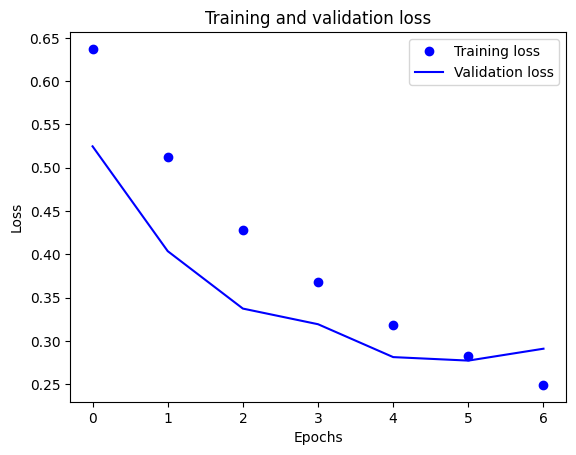

In [19]:
plt.plot(history.history["loss"], "bo", label="Training loss")
plt.plot(history.history["val_loss"], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Training and validation accurracy

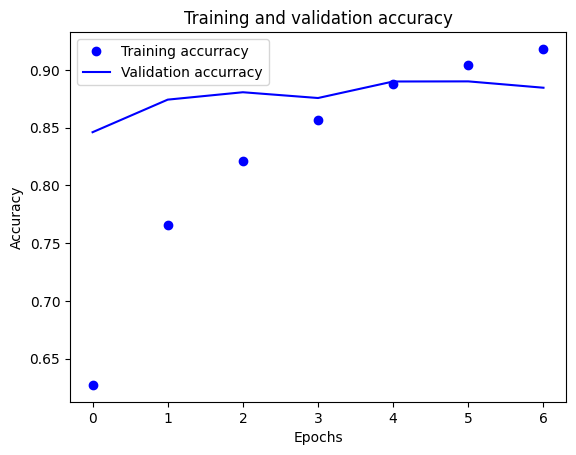

In [23]:
plt.plot(history.history["acc"], "bo", label="Training accurracy")
plt.plot(history.history["val_acc"], "b", label="Validation accurracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Test Loss and Accuracy

In [25]:
results = model.evaluate(x_test, y_test)
print(f"Loss value: {round(results[0], 2)}")
print(f"Accuracy value: {round(results[1], 4) * 100} %")

782/782 [==============================] - 0s 557us/step - loss: 0.3075 - acc: 0.8790
Loss value: 0.31
Accuracy value: 87.9 %
